In [44]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_iter1 = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
#filename_to_import_csv_data_from = r'./data/240731/240816_fine_ball_R0I3_air_R120_12pts_bvals_shifted.csv'
b0map_iter1.import_from_csv(filename_to_import_csv_data_from)
b0map_iter1.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/newinit_norings_240812_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/newinit_norings_240812,,,,,,
 not used. path data taken from csv!
OOPS
OOPS
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.00280662 -0.01683974 -0.01543643]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 7126
len(b0Data)= 7126
-110.01403311815879  < x <  109.9859668818412
-110.0014033118159  < y <  109.99859668818416
-110.01262980634294  < z <  109.98737019365711
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step

c:\cosi-measure\Software\COSI2\b0.py:303: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>1.25:


In [239]:

# spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.0131016338168
(23, 23, 23)
Mean field strength in 24 cm sphere: -47.57 mT
Inhomogeneity in 24 cm sphere: -6601 ppm
Inhomogeneity of fit: 6857 ppm
Error: -72314727 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 6785 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


-47.56732037161137
-47.74309304949422 -47.42032535912978


<Figure size 640x480 with 0 Axes>

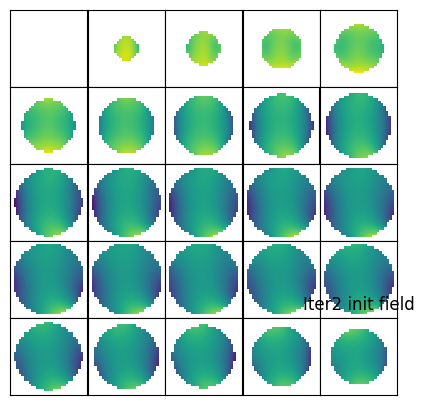

In [240]:
# ONE MAGNET field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine
FieldMeasured = b0map_iter1.interpolatedField
print(np.nanmean(FieldMeasured))

print(np.nanmin(FieldMeasured),np.nanmax(FieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(FieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('Iter2 init field')

plt.savefig('./pics/iter2_init_field.png',format="png")
plt.savefig('./pics/iter2_init_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [241]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [276]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
NEW_B_REM = 1.35*1.35*1.7
bRem                = NEW_B_REM #1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 260*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[-58.5 -40.5   4.5 121.5]


In [277]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=260 mm YZ circle with X=0
336
-0.0585 0.25634002592118954 -0.04347172771726347
-0.0585 0.25837121755087095 -0.029057080742575094
-0.0585 0.2595924850253051 -0.01455134764847503
-0.0585 0.26 0.0
-0.0585 0.2595924850253051 0.014551347648475035
-0.0585 0.25837121755087095 0.029057080742575105
-0.0585 0.25634002592118954 0.04347172771726347
-0.0585 0.24373283831314335 0.09052239241104448
-0.0585 0.23828457837705758 0.10402143869254984
-0.0585 0.23208936048768317 0.11719440578977419
-0.0585 0.22516660498395408 0.12999999999999998
-0.0585 0.21753801283920812 0.14239807923553086
-0.0585 0.2092274976344825 0.1543497788583211
-0.0585 0.20026111059587987 0.16581763351014503
-0.0585 0.16581763351014503 0.20026111059587987
-0.0585 0.1543497788583211 0.2092274976344825
-0.0585 0.14239807923553086 0.21753801283920812
-0.0585 0.13000000000000003 0.22516660498395405
-0.0585 0.11719440578977419 0.23208936048768317
-0.0585 0.10402143869254979 0.2382

magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  31
computing field of one shim magnet at  -0.0585 0.25634002592118954 -0.04347172771726347
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  31
computing field of one shim magnet at  -0.0585 0.25837121755087095 -0.029057080742575094
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  31
computing field of one shim magnet at  -0.0585 0.2595924850253051 -0.01455134764847503
magnet created, dipole points to  [0. 1. 0.]
[

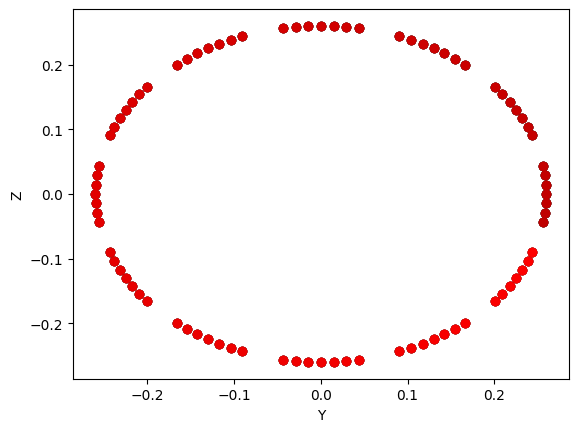

In [278]:

import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_iter1.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_iter1.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_iter1.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = NEW_B_REM # T
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3*1.35*2

print(DSV)


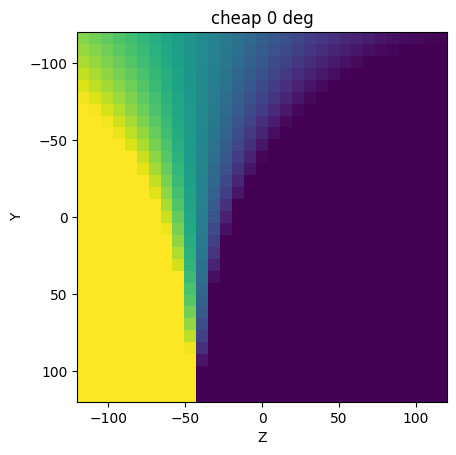

[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]


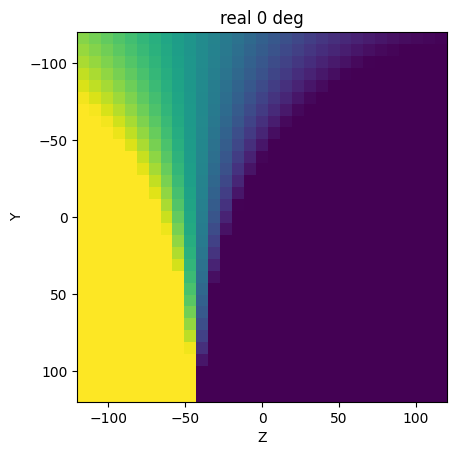

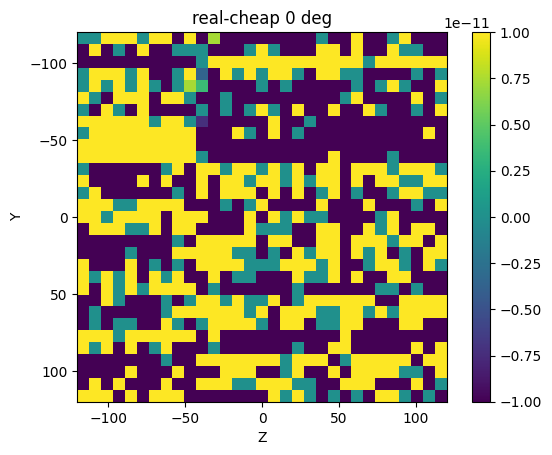

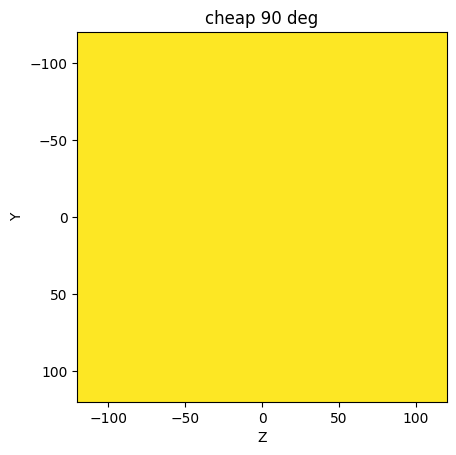

[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]


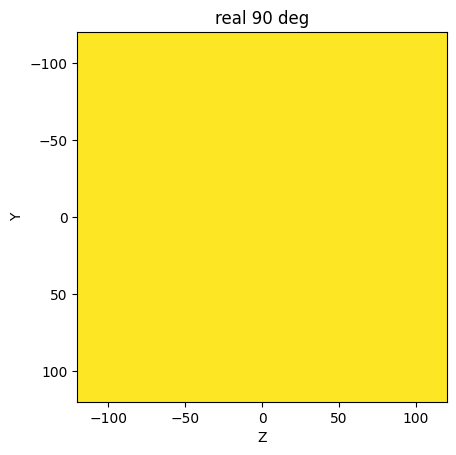

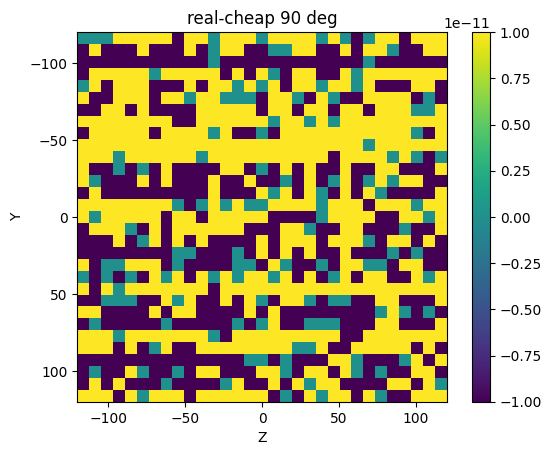

In [279]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_iter1.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/4
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-11, vmax=1e-11,extent=[-v,v,v,-v])
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3

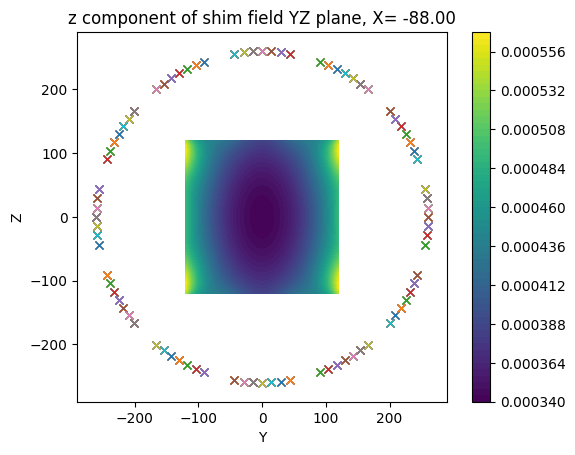

In [280]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_iter1.xDim_SPH_fine*1e0
Y = b0map_iter1.yDim_SPH_fine*1e0
Z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi/2

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 4
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [281]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    print(magnet.position)
    alpha =np.pi/2#!TEMP-np.pi/2
    magnet.bRem = NEW_B_REM # T #!!! IMPORTANT !!!
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    MagnetsField_simulated += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask
MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


[-0.0585, 0.25634002592118954, -0.04347172771726347]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[-0.0585, 0.25837121755087095, -0.029057080742575094]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[-0.0585, 0.2595924850253051, -0.01455134764847503]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[-0.0585, 0.26, 0.0]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[-0.0585, 0.2595924850253051, 0.014551347648475035]
[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[-0.0585, 0.25837121755087095, 0.029057080742575105]
[0.00000000e+00 3.83638581e-24 6.26

31


<Figure size 640x480 with 0 Axes>

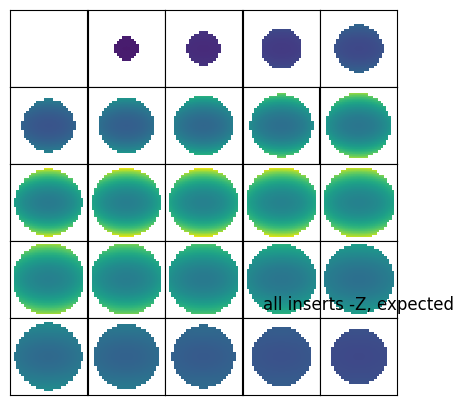

In [282]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        #xxx = axes[j,i].imshow(oneMagnetField_simulated[:,:,i+j*5],clim=[-0.00000087,-0.00000073])
        xxx = axes[j,i].imshow(MagnetsField_simulated[i+j*mapsize,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('all inserts -Z, expected')

plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


31
-47.42032535912978
0.7490913
-14082.735515499133 PPM


<Figure size 640x480 with 0 Axes>

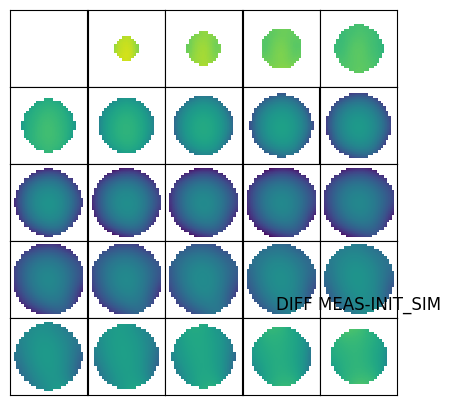

In [283]:
# measured - expected:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine
Field_measured = b0map_iter1.interpolatedField

d = np.shape(coordinate_grid[0])
print(d[0])

print(np.nanmax(Field_measured))
print(np.nanmax(MagnetsField_simulated))


MagnetsField_simulated_SCALED = MagnetsField_simulated #!!! TEMP

print((np.nanmax(Field_measured-MagnetsField_simulated_SCALED)-np.nanmin(Field_measured-MagnetsField_simulated_SCALED))/np.nanmean(Field_measured)*1e6,'PPM')

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(Field_measured[i+j*mapsize,:,:]-MagnetsField_simulated_SCALED[i+j*5,:,:],clim=[np.nanmin(Field_measured-MagnetsField_simulated_SCALED),np.nanmax(Field_measured-MagnetsField_simulated_SCALED)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF MEAS-INIT_SIM')

plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.png',format="png")
plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

(31, 31, 31, 3, 336)


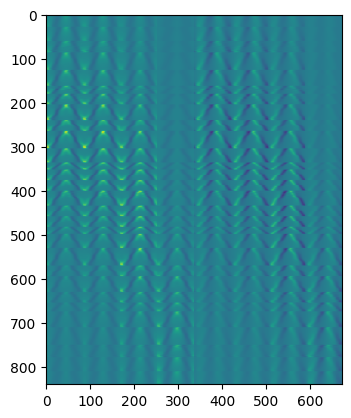

In [284]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
# DSV = b0map.path.radius*2 # DEFINED ABOVE!
b0map = b0map_iter1

DSV_INNER = b0map.path.radius*1.96 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [285]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(840, 672)
(672,)
(840,)


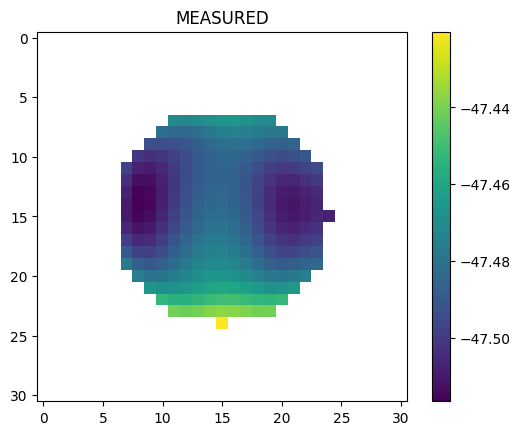

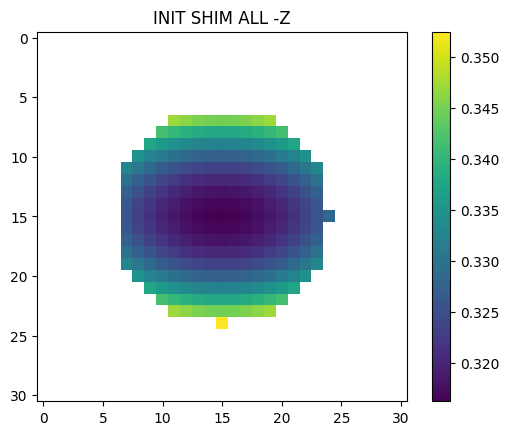

(840,)
(31, 31, 31)


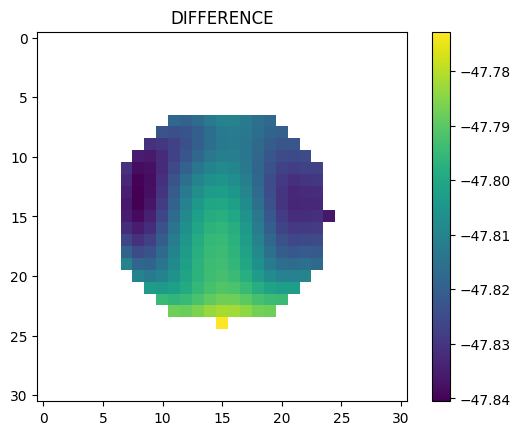

In [286]:
plt.imshow(Field_measured[3,:,:])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[3,:,:])
plt.title('INIT SHIM ALL -Z')
plt.colorbar()
plt.show()
plt.imshow(Field_measured[3,:,:]-1*MagnetsField_simulated[3,:,:])
plt.colorbar()
plt.title('DIFFERENCE')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [287]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):
            #factor = 1+np.random.randint(10)/1000
            #shimVector = shimVector*factor
            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked*1.00,stackedRotationVector)+initialFieldMasked
            #optimizedField = np.matmul(magnetFields[...,1,:], np.cos(shimVector)) + np.matmul(magnetFields[...,2,:], np.sin(shimVector))
            #shimField = optimizedField + initialField
            #shimField[np.isnan(shimField)] = np.nanmean(shimField)*1
            #shimField = shimField[~np.isnan(shimField)]
            

            #shimField = shimField.flatten()

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

[0.00000000e+00 3.83638581e-24 6.26529349e-08]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.83638581e-24 6.26529349e-08]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3.6450000000000005
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 6.26529349e-08 0.00000000e+00]
[0.00000000e+00 6.26529349e-08 0.00000000e+00]
3

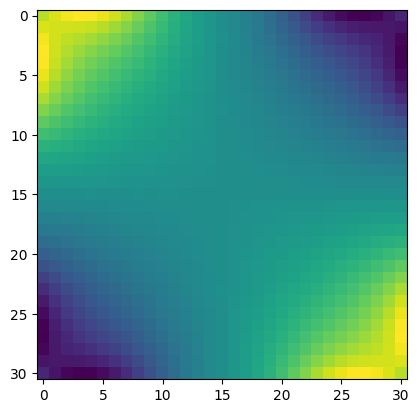

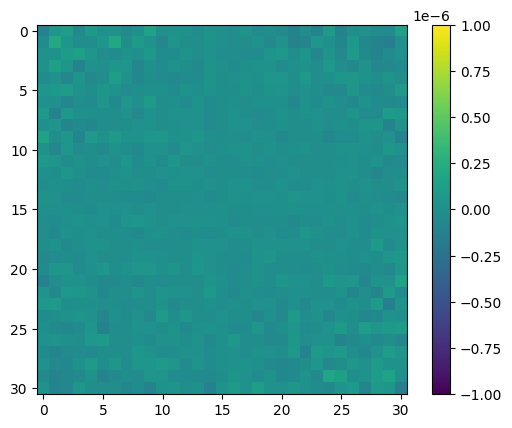

In [288]:
#render the field of rotated magnets
optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
#optimized_vector_of_magnet_rotations = np.load('opt1e3.npy')
shimming_magnets[0].render_field(coordinate_grid)
shimFieldRendered = shimming_magnets[0].B0*0

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0
    
shimFieldRendered*=1e3#e3*NEW_B_REM

optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


plt.imshow(shimFieldRendered[6,:,:,2])
plt.show()
plt.imshow(optimized_shim_Field[6,:,:]-shimFieldRendered[6,:,:,2],vmin=-1e-6,vmax=1e-6)
plt.colorbar()
plt.show()


In [289]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('opt1e3.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-5,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


187181.5266290721


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6472e+07                                    1.05e+08    
       1              2         3.6739e+07      1.97e+07       4.42e-01       6.39e+07    
       2              3         3.1104e+07      5.63e+06       2.61e-01       5.45e+07    
       3              4         2.4113e+07      6.99e+06       9.34e-01       3.45e+07    
       4              5         2.2399e+07      1.71e+06       1.48e-01       1.95e+07    
       5              6         2.1705e+07      6.95e+05       1.06e-01       2.00e+07    
       6              7         2.1127e+07      5.77e+05       9.59e-02       1.33e+07    
       7              8         2.0804e+07      3.23e+05       7.33e-02       1.39e+07    
       8              9         2.0016e+07      7.89e+05       4.29e-01       1.16e+07    
       9             10         1.9820e+07      1.96e+05       5.89e-02       8.14e+06    

In [290]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('opt1e3',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM
    #pos = positions[idx]
    #magnet.position = positions[idx]
    #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))
#print(np.shape(optimizedField))



shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[2.99139356e+02 3.01971565e+02 2.99255417e+02 2.95784920e+02
 2.89456687e+02 1.98283484e+02 1.12659512e+02 8.70364814e+01
 8.78007010e+01 8.75957015e+01 9.06966185e+01 9.25109808e+01
 9.17717517e+01 8.83149593e+01 3.59941569e+02 3.59765440e+02
 3.59895820e+02 3.59213368e+02 3.59297680e+02 3.58972467e+02
 3.58765185e+02 3.59981437e+02 3.59999389e+02 3.59997009e+02
 3.52869846e+02 1.80401877e+02 1.62586656e+02 1.75132671e+02
 1.75427459e+02 1.68557859e+02 1.61217164e+02 1.53090427e+02
 1.44507270e+02 1.35573275e+02 1.26328361e+02 9.46037538e+01
 8.57766007e+01 7.77563661e+01 3.59668988e+02 6.78870379e+01
 6.37102277e+01 5.85309207e+01 2.36741361e+02 2.46563020e+02
 2.55019443e+02 2.58316901e+02 2.54713844e+02 2.47193843e+02
 2.39251006e+02 2.21141750e+02 2.20686237e+02 2.26235150e+02
 2.54446743e+02 3.06366983e+02 3.26144992e+02 3.42921739e+02
 3.49984393e+02 6.16014938e+01 3.43691328e+02 3.59331006e+02
 1.39125988e+02 3.58471298e+02 3.59032956e+02 3.59942608e+02
 3.59910885e+02 3.598492

31


<Figure size 640x480 with 0 Axes>

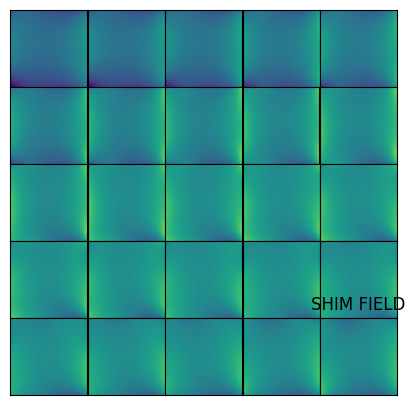

In [291]:
# SHIM FIELD
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(optimized_shim_Field[i+j*mapsize,:,:],clim=[1.00*np.nanmin(optimized_shim_Field)+shimoffset,1.00*np.nanmax(optimized_shim_Field)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIM FIELD')

plt.savefig('./pics/shim_field_ITER2.png',format="png")
plt.savefig('./pics/shim_field_ITER2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



31
shimmed HOMO,ppm: 1967.6004334806596


<Figure size 640x480 with 0 Axes>

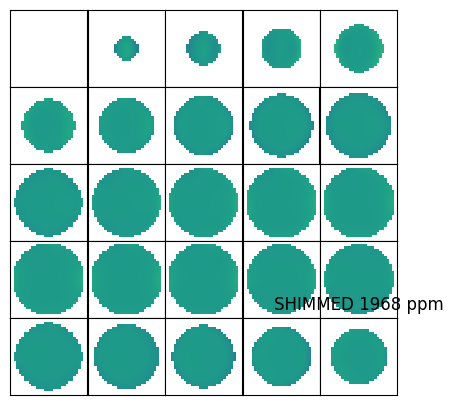

In [292]:
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine


shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimmed_Field_final = initialField+optimized_shim_Field
homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED %.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


